#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [8]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [9]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [10]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [11]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [12]:
#針對Label 做 ONE HOT ENCODE
y_label_train_OneHot = keras.utils.to_categorical(y_label_train)
y_label_test_OneHot = keras.utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [14]:
model = Sequential()

In [15]:
#卷積層1

In [16]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(Dropout(rate=0.25))

In [18]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
#卷積層2與池化層2

In [20]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [21]:
model.add(Dropout(0.25))

In [22]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [23]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [24]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [25]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [26]:
model.add(Dense(10, activation='softmax'))

In [27]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,224,970 (16.12 MB)

 Trainable params: 4,224,970 (16.12 MB)

 Non-trainable params: 0 (0.00 B)

None


# 載入之前訓練的模型

In [28]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [29]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [30]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Epoch 1/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.0999 - loss: 0.0913 - val_accuracy: 0.1207 - val_loss: 0.0899
Epoch 2/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.1112 - loss: 0.0903 - val_accuracy: 0.1282 - val_loss: 0.0897
Epoch 3/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.1198 - loss: 0.0900 - val_accuracy: 0.1414 - val_loss: 0.0896
Epoch 4/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.1257 - loss: 0.0898 - val_accuracy: 0.1523 - val_loss: 0.0895
Epoch 5/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.1311 - loss: 0.0897 - val_accuracy: 0.1614 - val_loss: 0.0894
Epoch 6/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1382 - loss: 0.0895 - val_accuracy: 0.1670 - val_loss: 0.0893
Epoch 7/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1442 - loss: 0.0893 - val_accuracy: 0.1750 - val_loss: 0.0891
Epoch 8/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1496 - loss: 0.0891 - val_accu

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

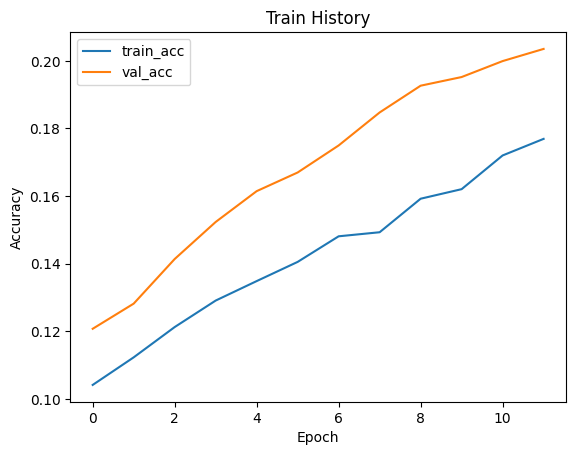

In [32]:
show_train_history('accuracy','val_accuracy')

In [35]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [36]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Epoch 1/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.1678 - loss: 0.3903 - val_accuracy: 0.2333 - val_loss: 0.3587
Epoch 2/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.1935 - loss: 0.3225 - val_accuracy: 0.2540 - val_loss: 0.3530
Epoch 3/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2144 - loss: 0.3152 - val_accuracy: 0.2898 - val_loss: 0.3471
Epoch 4/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2272 - loss: 0.3095 - val_accuracy: 0.3014 - val_loss: 0.3418
Epoch 5/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2451 - loss: 0.3047 - val_accuracy: 0.2985 - val_loss: 0.3382
Epoch 6/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2597 - loss: 0.3021 - val_accuracy: 0.3102 - val_loss: 0.3348
Epoch 7/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.2659 - loss: 0.2988 - val_accuracy: 0.3107 - val_loss: 0.3333
Epoch 8/12
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.2707 - loss: 0.2977 - val_accu

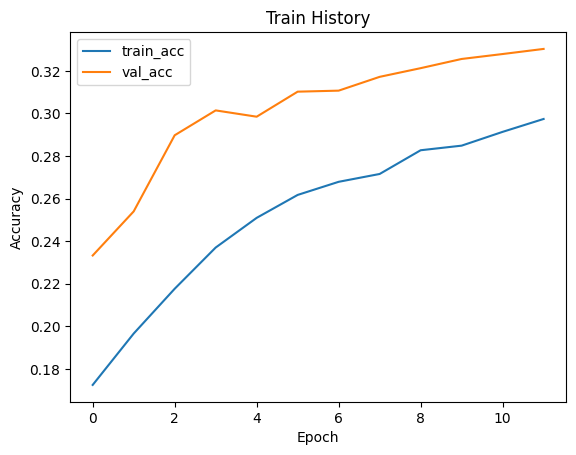

In [37]:
show_train_history('accuracy','val_accuracy')